#Estudio de caso Expectativa de vida

**Autor**: Franio Eduardo Castro Palechor

**Talento Tech- cohorte 01**


*   Planteamiento del problema:
la espectativa de vida en los paises del mundo, ha estado sujeta a muchas caracteristicas politicas, economicas, para el desarrollo de este caso de estudio analizaremos el dataset encontrado en kagle donde se recopilo informacion de 192 paises en varios aspectos, desde la mortalidad hasta los años estudiados por persona en dicho pais, se quiere encontrar una relacion fuerte entre las condiciones que hacen que la espectativa de vida aumente o disminuya, y generar una prediccion basada en las variables donde haya mas impacto a la esperanza de vida.
para el estudio de caso se realizaron los siguientes pasos:
*   Importacion de librerias
*   Importacion y lectura del dataset (Estructura del dataset)
*   Analisis exploratorio (datos estadisticos, graficas)
*   Tratamiento de datos faltantes, atipicos y codificacion de variables categoricas
*  Escalamiento de datos(Normalizacion y escalamiento)
*  Regresion (simple, multiple y generar prediccion)
*  Clustering


**Dataset**: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who



# Variables

## variables

|Columna | Descripcion
|------|------------
|**Country** | Pais
|**Year**| 2000-2013
|**Status**|Estado del pais **Developing** or **Developed**
|**Life expectancy**|Esperanza de vida en edad
|**Adult Mortality**|Tasa de mortalidad en adultos de ambos sexos (probabilidad de morir entre 15 y 69 años por cada 1000 habitantes)
|**infant deaths**|Numero de muertes infantiles por cada 1000 habitantes
|**Alcohol**|Alcohol, consumo percapita  (15+)  (litros de alcohol puro)
|**percentage expenditure**|Gasto en salud como porcentaje del PIB per capita(%)
|**Hepatitis B**|Cobertura de vacunacion contra la hepatitis B entre ninos de 1 year (%)
|**Measles**|Numero de casos positivos por cada 1000 habitantes
|**BMI**|Indice de masa corporal promedio de toda la poblacion
|**under-five deaths**|Numero de muertes de menores de 5 años por cada 1000 hbaitantes
|**Polio**|Polio (Pol3) Cobertura de vacunacion contra la polio entre niños de 1 año (%)
|**Total expenditure**|Gasto total del gobierno general en salud como porcentaje del gasto publico (%)
|**Diphtheria**|cobertura de vacunacion con toxoide difterico, tetanico y tos ferina  entre niños de 1 año (%)
|**HIV/AIDS**|Muertes por cada 1000 nacidos vicos  HIV/AIDS (0-4 años)
|**GDP**|producto interno bruto per capita (in USD)
|**Population**|Poblacion del pais
|**thinness  1-19 years**|Prevalencia de delgadez  entre ninos y adolescentes de 10 a 19 años (% )
|**thinness 5-9 years**|Prevalencia de delgadez entre ninos de 5 a 9 años(%)
|**Income composition of resources**|indice de desarrollo humano en terminos de composicion de ingresos de los recursos (indice de 0 a 1)
|**Schooling**|numero de años de escolaridad (años)

## Clasificacion de variables

|Categoricas | numericas
|------|------------
|**Country** | **year**
|**Status**| **life expectancy**
| | **adult mortality**
|| **infant deaths**
| | **Alcohol**
|| **percentaje expediture**
| | **Hepatitis B**
|| **Measles**
| | **BMI**
|| **under-five-deaths**
|| **polio**
| | **Total expediture**
|| **Diptheria**
|| **HIV/AIDS**
| | **GDP**
|| **Population**
|| **thinness 10-19 years**
| | **thinnes 5-9 years**
|| **Income composition of resources**
|| **Schooling**


# Importacion de librerias

In [1]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import umap

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Importacion y lectura del dataset

In [3]:
ruta = '/content/Life Expectancy Data.csv'
data = pd.read_csv(ruta)

In [4]:
# visualizacion de las primeras 5 filas del dataset
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
# visualizacion columnas y filas completas del dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#data

## Estructura del dataset

In [6]:
# numero de filas y columnas
filas = data.shape[0]
columnas = data.shape[1]

print(f'hay :',filas,'filas','y',columnas,'columnas','en el dataset')

hay : 2938 filas y 22 columnas en el dataset


In [7]:
# informacion de las variables del dataset, numero de filas y tipo de Dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
# Cantidad de valores nulos por cada una de las columnas
nulos = data.isnull().sum()
nulos

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
# porcentaje de datos nulos para cada una de las columnas
porcentaje_nulos = data.isnull().sum()/data.shape[0]*100
porcentaje_nulos

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [10]:
# encontrando Valores duplicados
duplicados = data.duplicated().sum()
print(f"Hay {duplicados} filas duplicadas en el DataFrame.")


Hay 0 filas duplicadas en el DataFrame.


# Analisis exploratorio

## Datos estadisticos(Numericos y categoricos)

In [11]:
# Datos estadisticos para variables numericas
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [12]:
# Datos estadisticos para variables categoricas
data.describe(include='object')

Country      Status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [13]:
# caracteristicas categoricas
feature_Status = data['Status'].value_counts()
feature_country = data['Country'].value_counts()
# feature_country
# feature_Status

## Graficas

### Histogramas

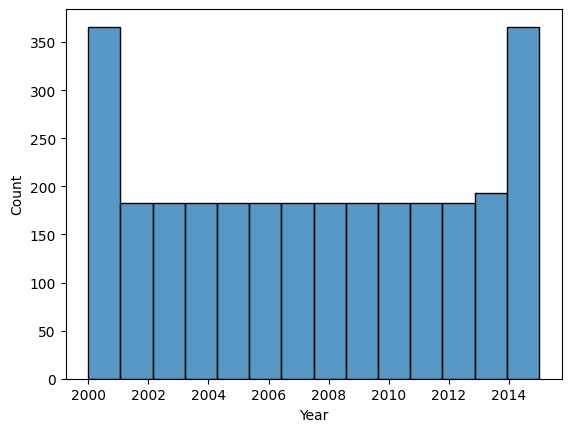

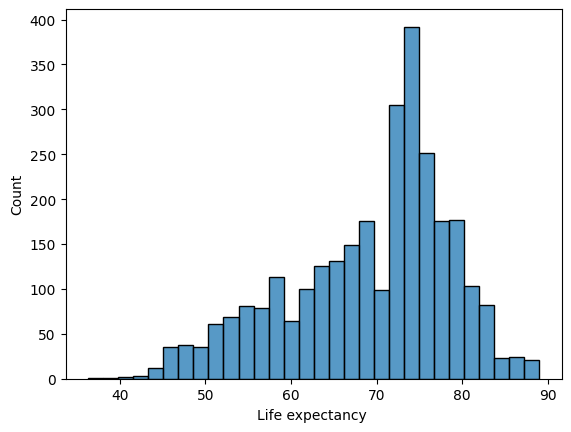

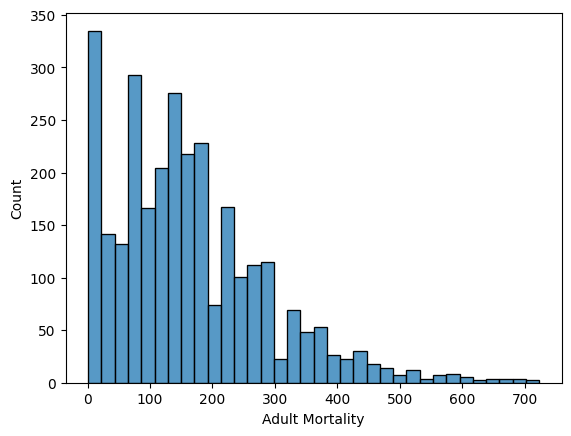

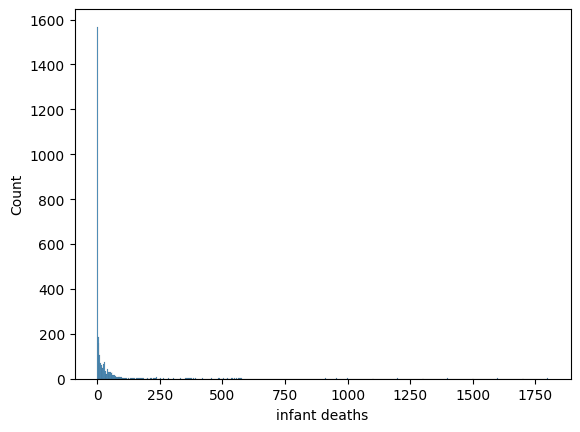

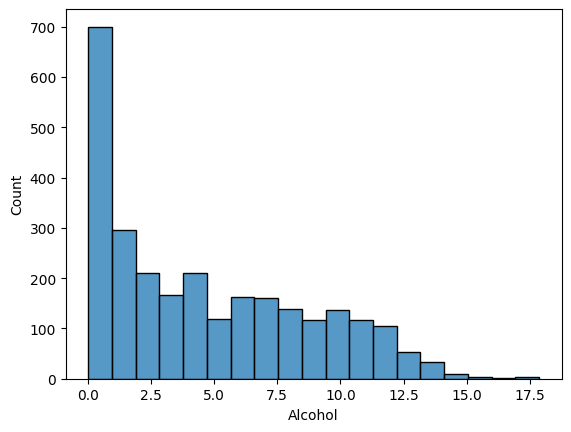

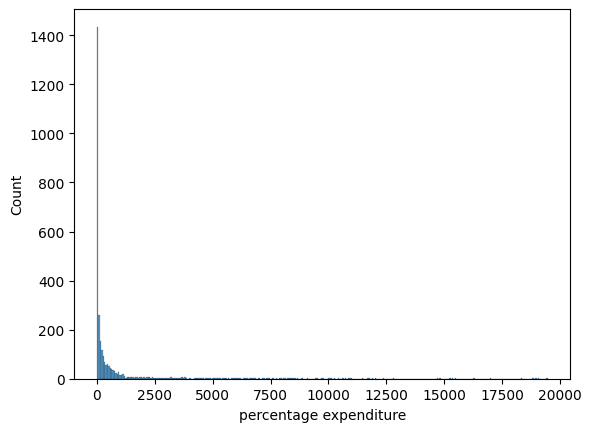

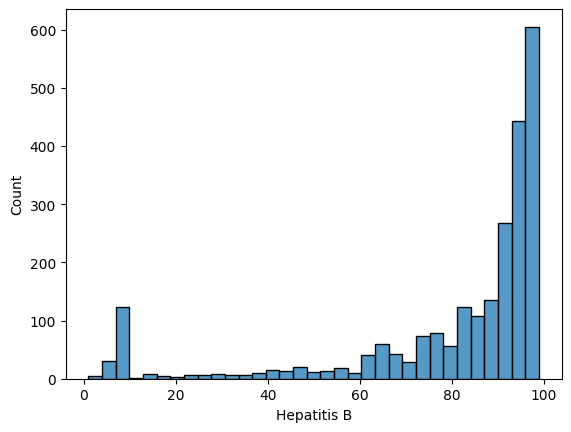

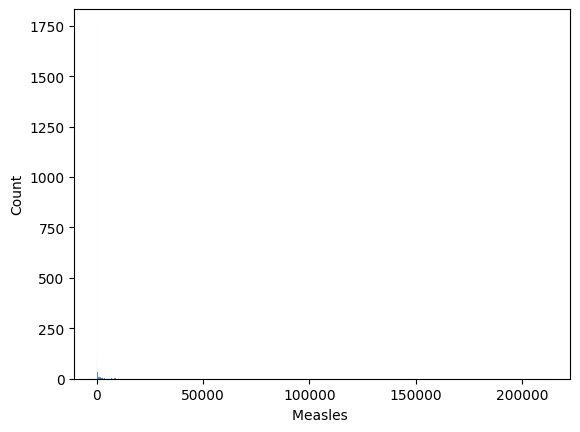

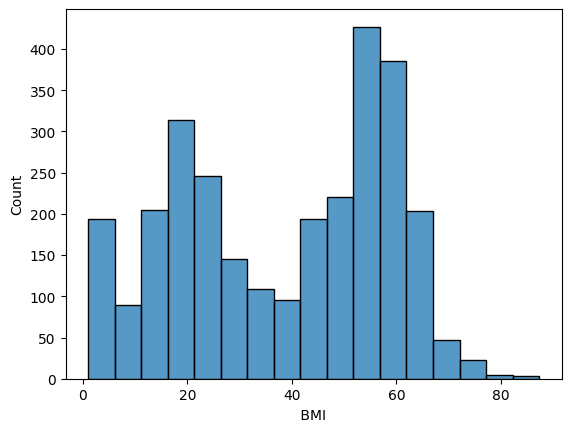

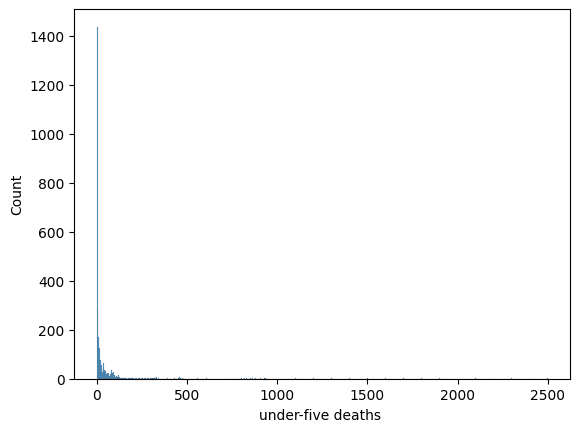

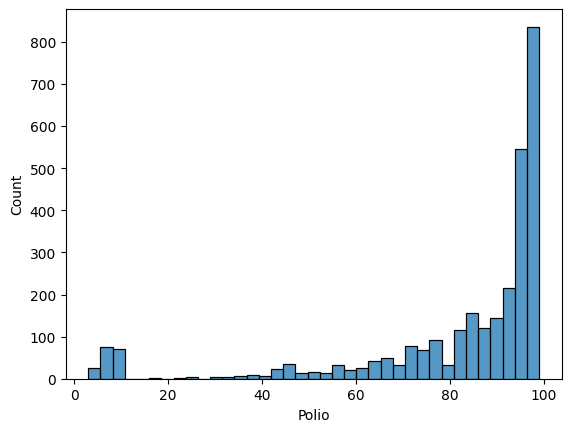

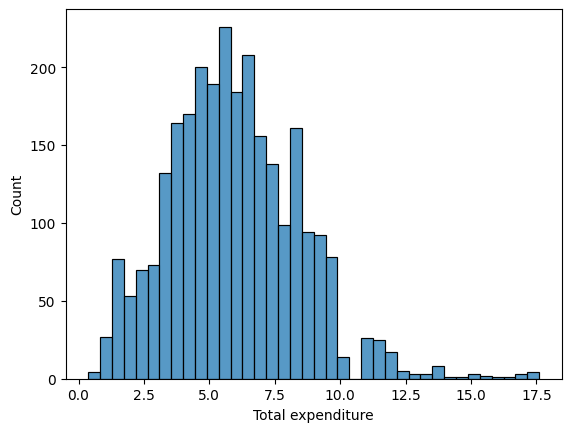

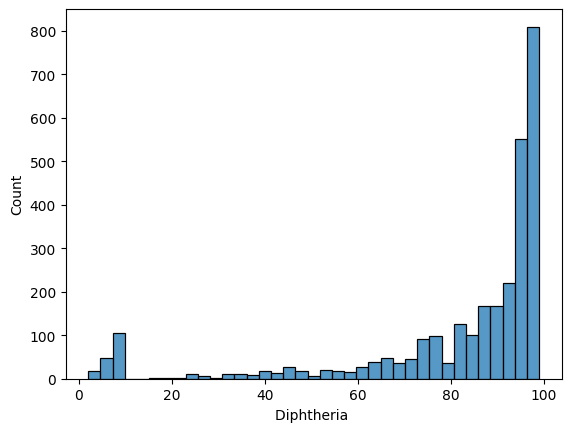

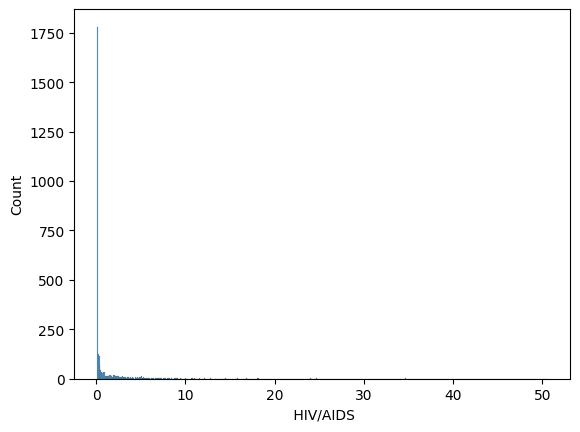

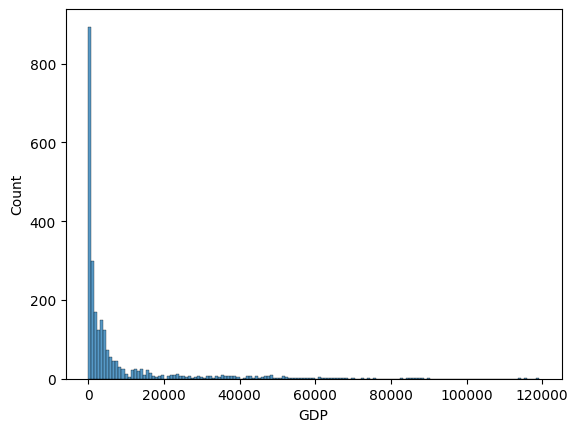

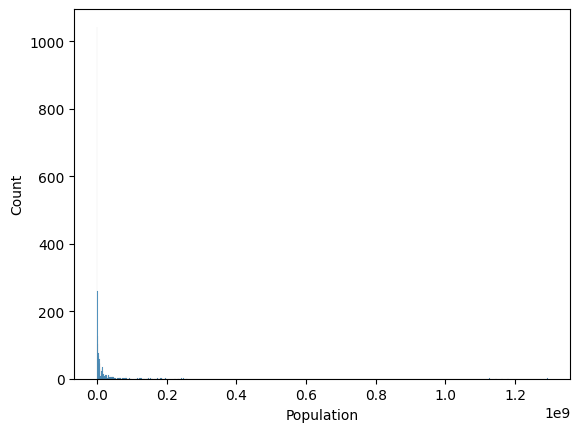

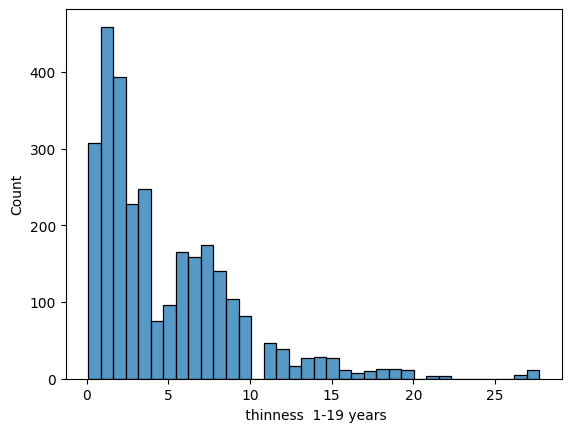

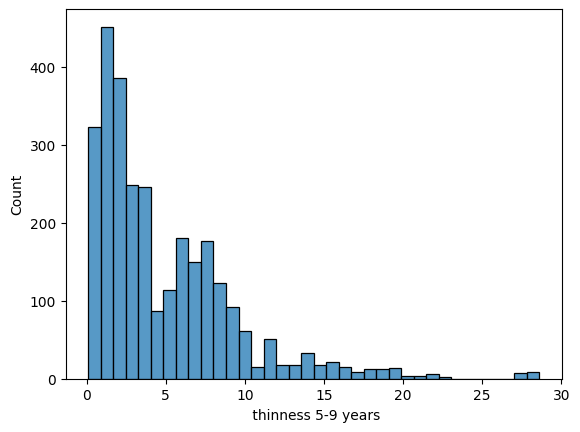

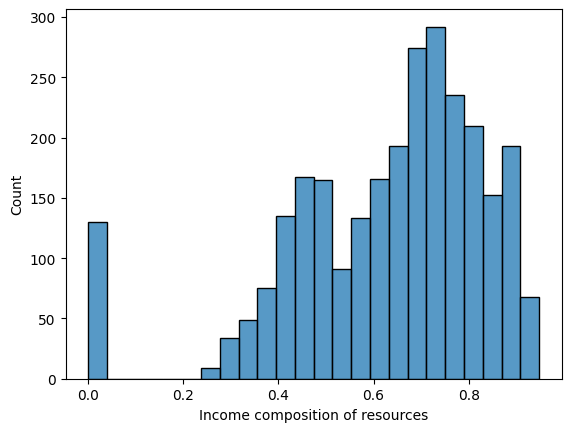

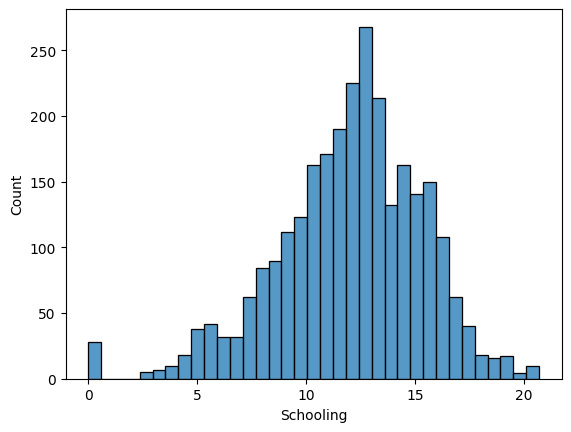

In [14]:
# Histograma para ver la distribucion de los datos en cada una de las variables
for i in data.select_dtypes(include='number').columns:
  sns.histplot(data= data, x=i)
  plt.show()

### Boxplot

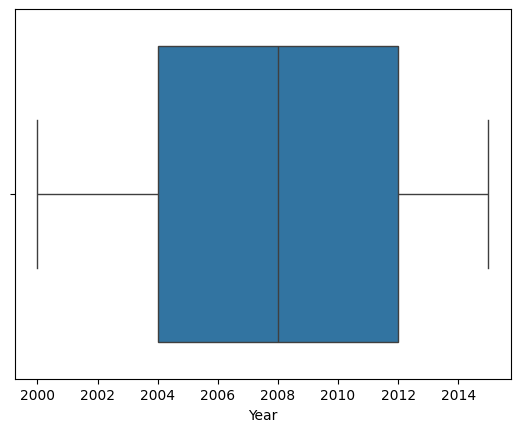

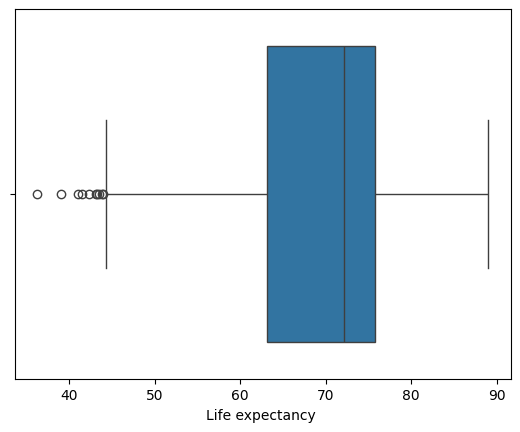

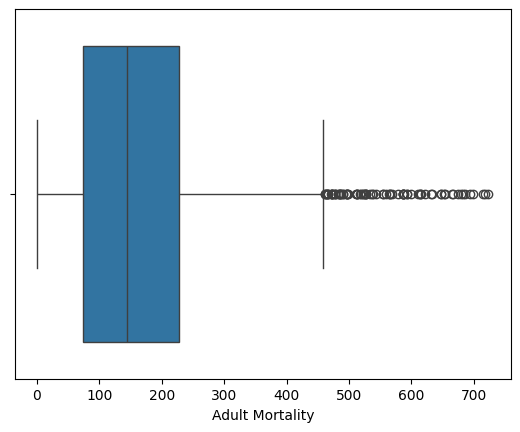

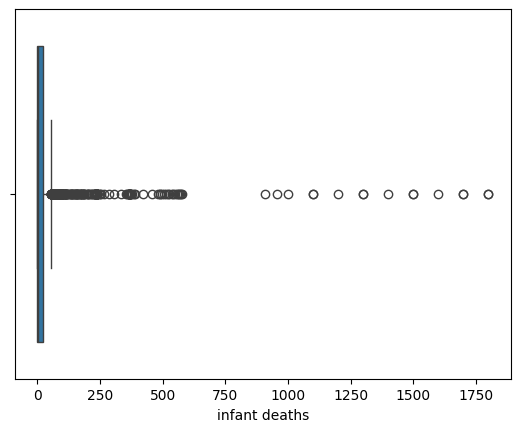

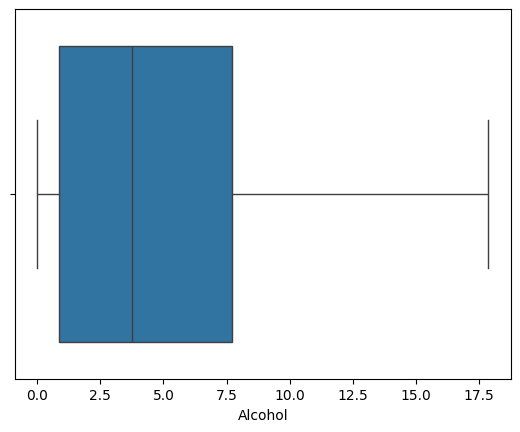

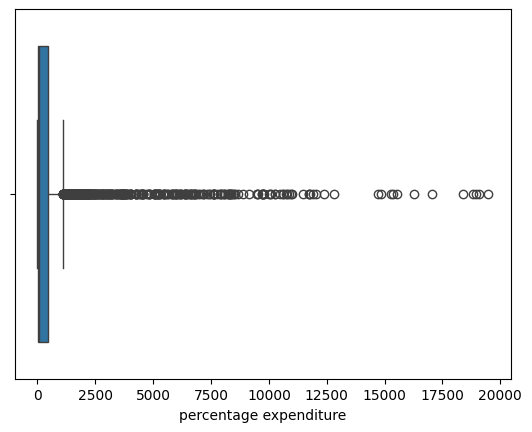

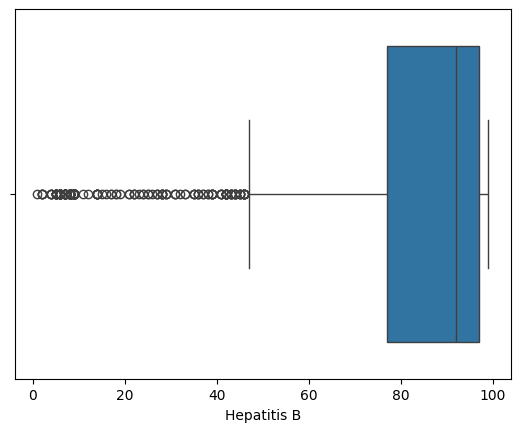

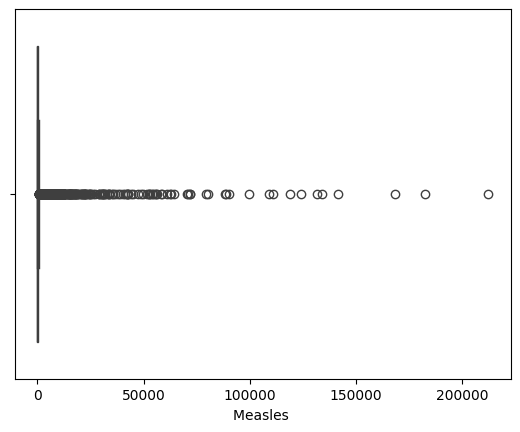

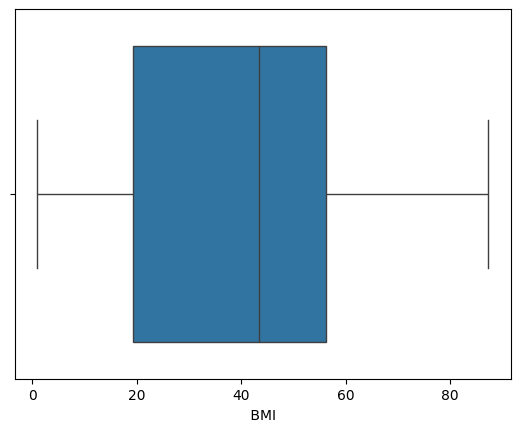

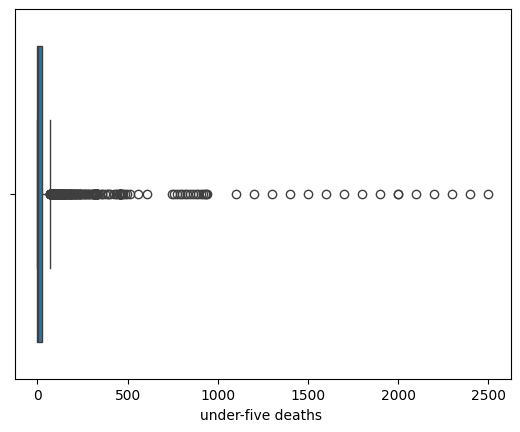

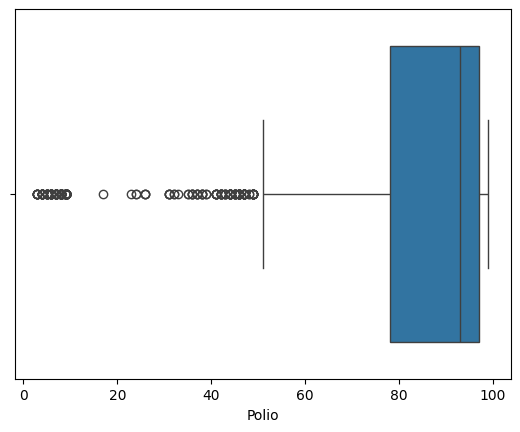

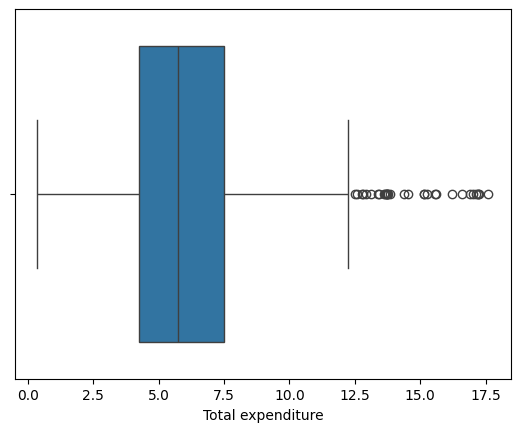

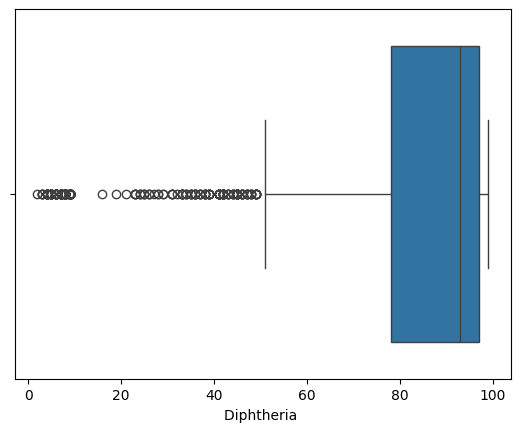

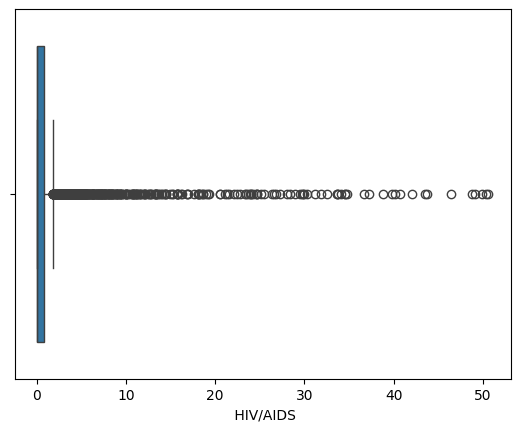

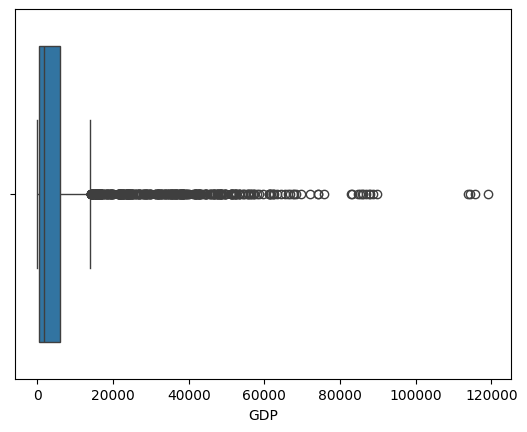

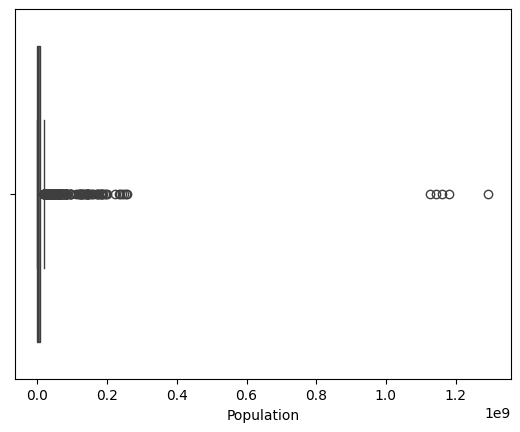

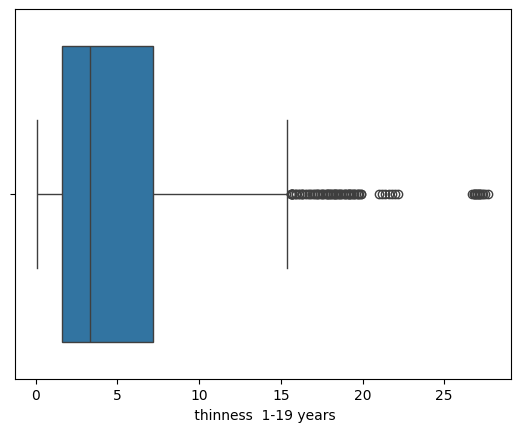

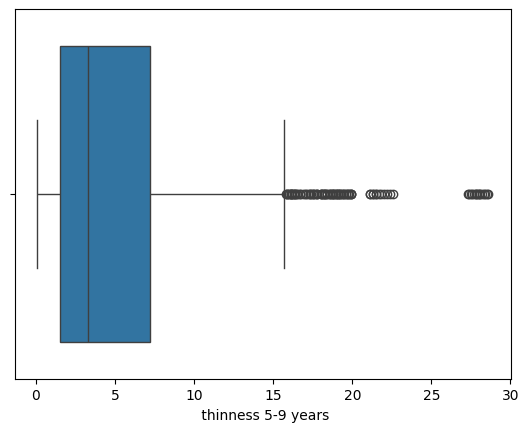

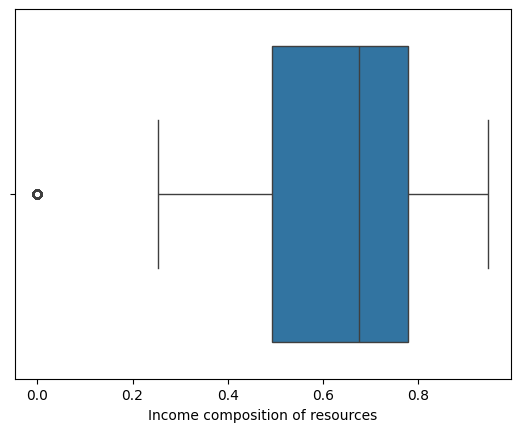

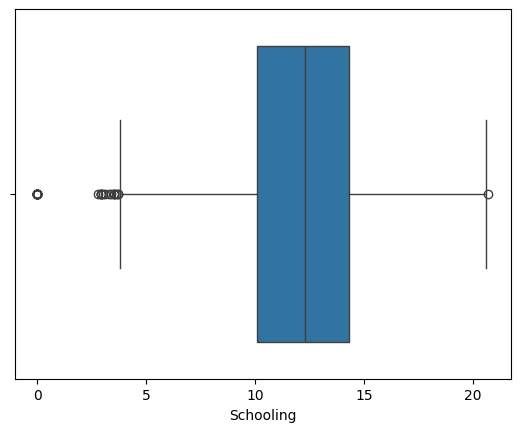

In [15]:
# Grafico de tipo boxplot para encontrar datos atipicos en cada una de las variables numericas
for i in data.select_dtypes(include='number').columns:
  sns.boxplot(data=data, x=i)
  plt.show()

In [16]:
# se encontro con la visualizacion de los graficos de boxplot que las columnas donde hay datos atipicos son:
#[
#    'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
#    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
#    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
#    ' thinness  1-19 years', ' thinness 5-9 years',
#    'Income composition of resources', 'Schooling'
#]

### Scatterplot

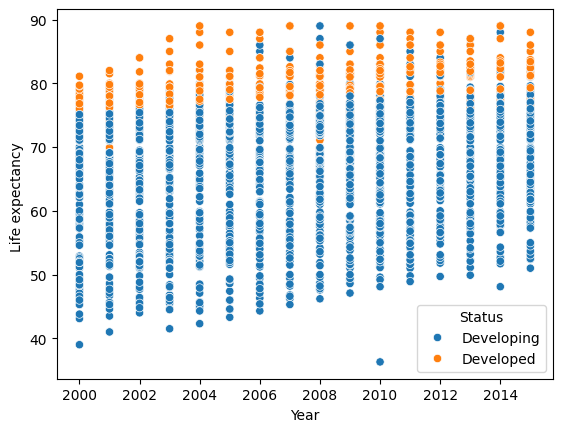

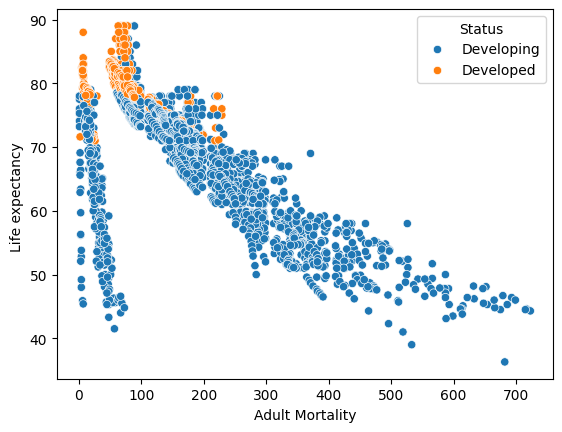

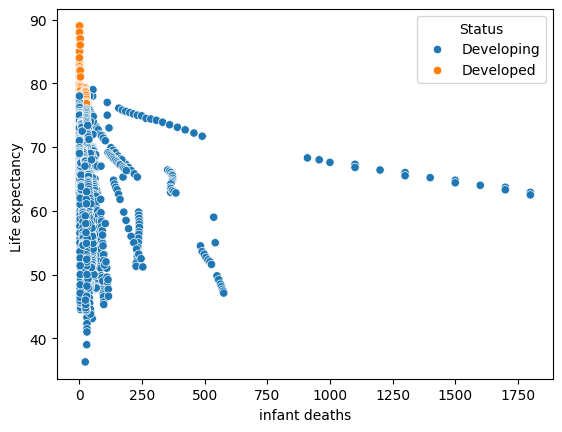

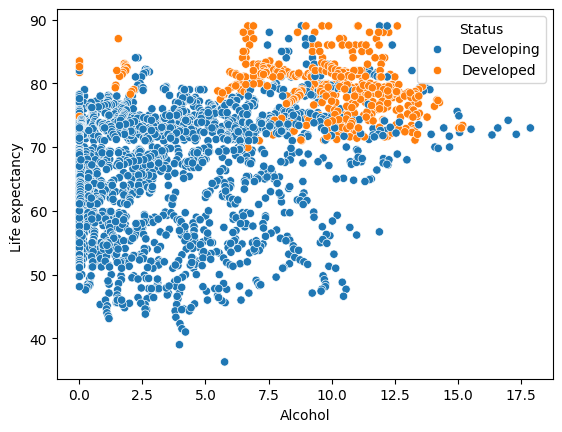

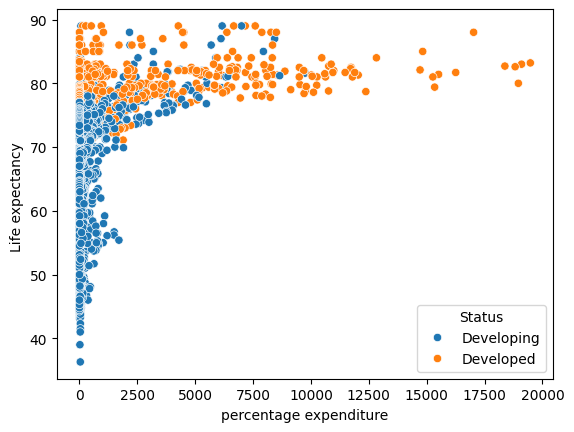

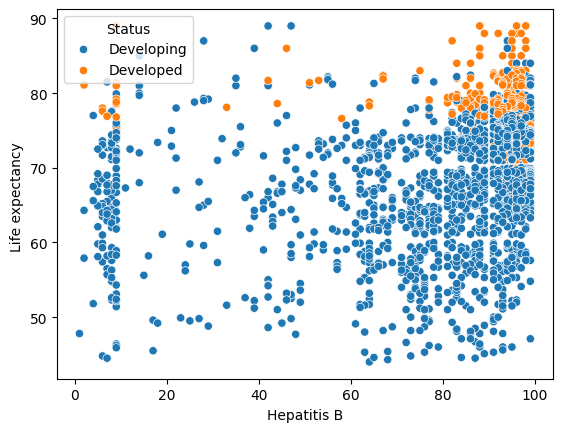

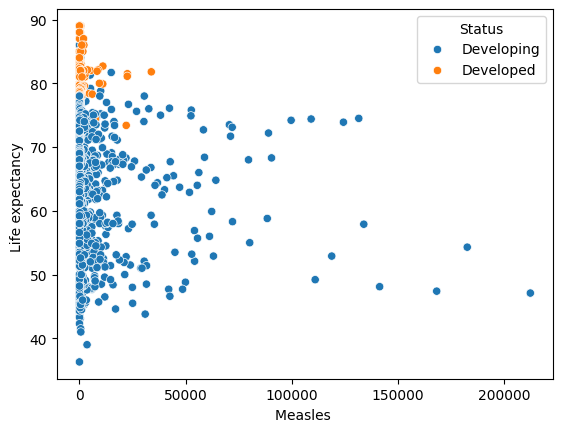

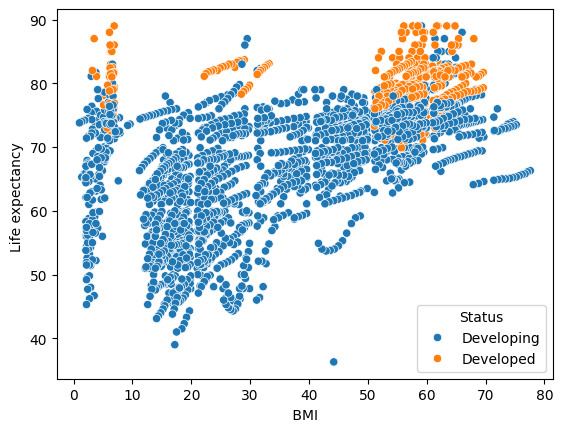

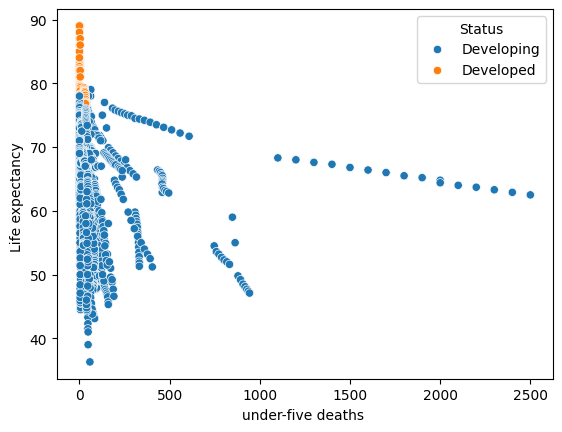

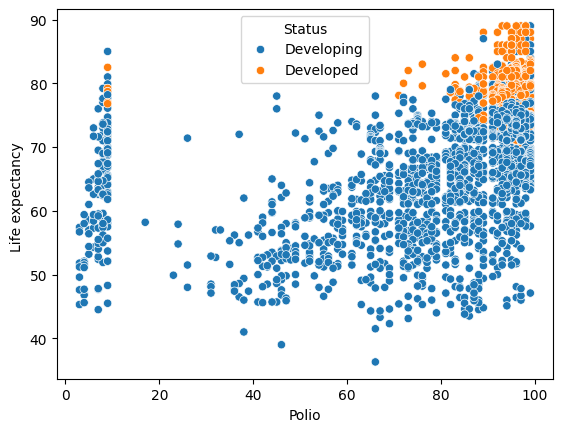

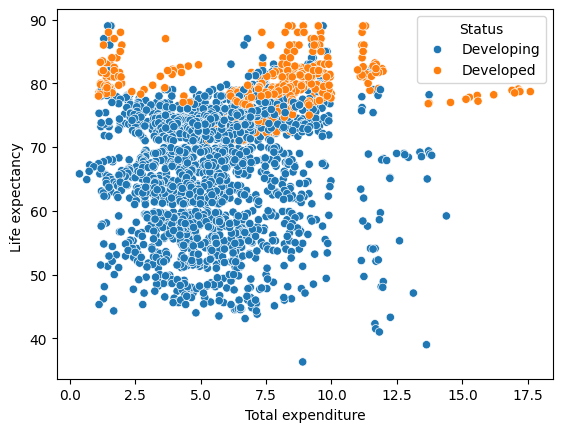

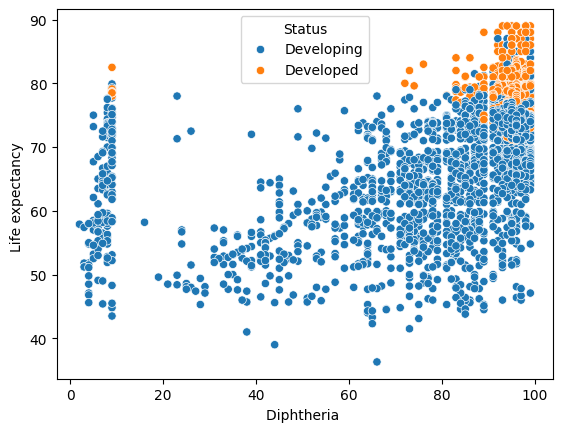

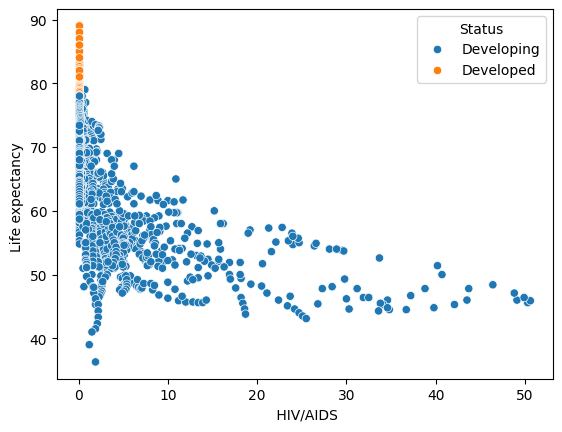

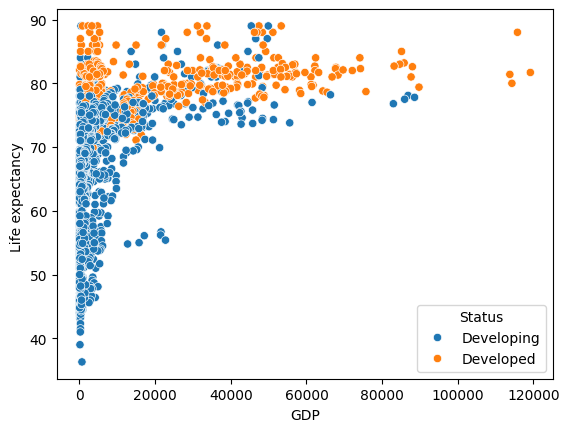

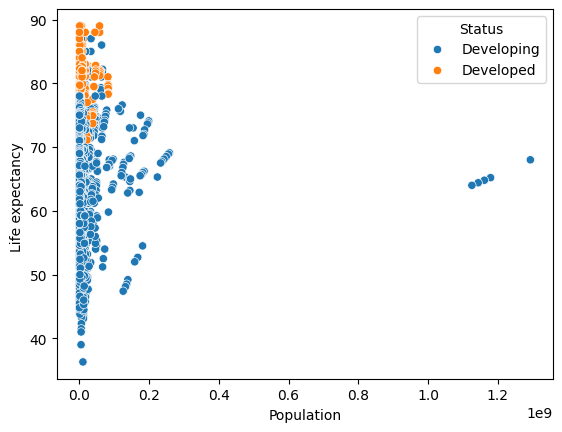

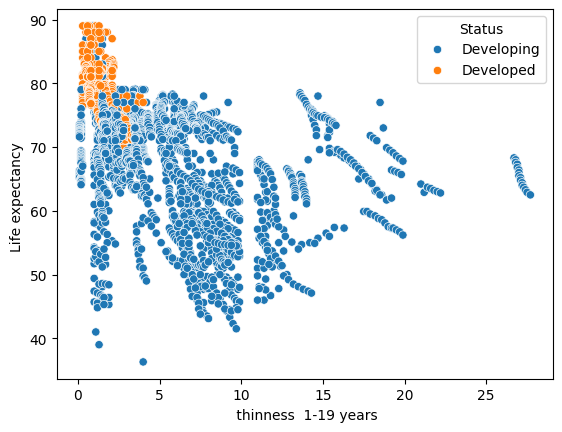

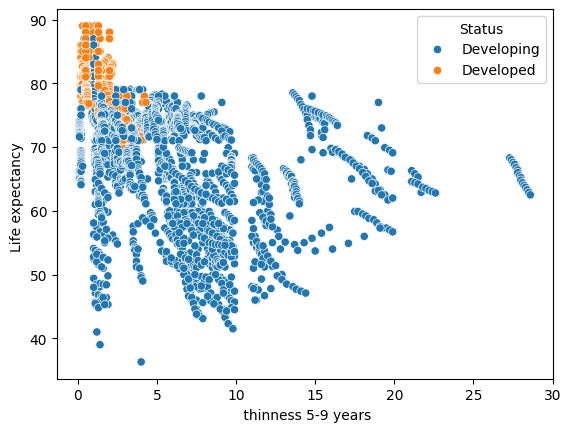

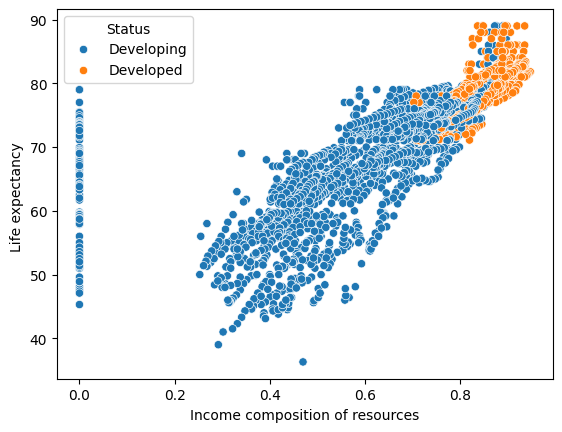

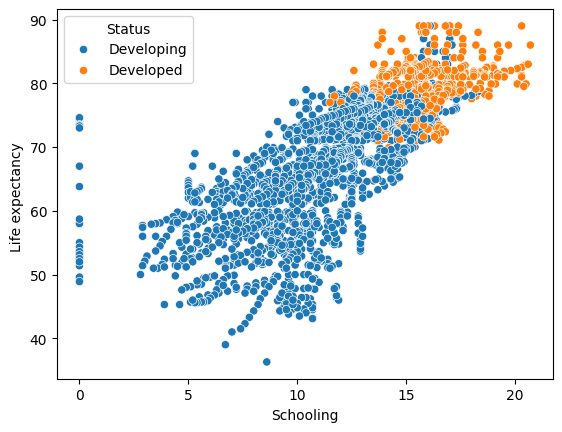

In [17]:
# Grafica de scatter o dispersion para identificar relaciones entre las variaables con respecto a la variable objetivo 'Life expectancy'
# con una segmentacion por la variable 'Status'

#numeric_cols = data.select_dtypes(include='number').columns
#categorical_cols = data.select_dtypes(include=['object']).columns

for i in ['Year', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']:
  sns.scatterplot(data=data,x=i,y='Life expectancy ', hue='Status')
  plt.show()


In [18]:
# interpretacion de los graficos scatterplot

#* Los gráficos de dispersión muestran la relación entre la esperanza de vida y varias variables numéricas, segmentadas por el estado del país (en desarrollo o desarrollado).
#* En general, los países desarrollados tienen una mayor esperanza de vida que los países en desarrollo.
#* Algunas variables tienen una correlación positiva con la esperanza de vida, lo que significa que a medida que aumentan los valores de estas variables, también aumenta la esperanza de vida. Por ejemplo, el gasto total del gobierno general en salud como porcentaje del gasto público (%) tiene una correlación positiva con la esperanza de vida.
#* Otras variables tienen una correlación negativa con la esperanza de vida, lo que significa que a medida que aumentan los valores de estas variables, disminuye la esperanza de vida. Por ejemplo, la tasa de mortalidad en adultos de ambos sexos, tiene una correlación negativa con la esperanza de vida.
#* Algunos gráficos muestran una relación no lineal entre la variable y la esperanza de vida. Por ejemplo, el gráfico de dispersión entre el índice de masa corporal [BMI] promedio de toda la población y la esperanza de vida muestra una forma de U, lo que sugiere que tanto el bajo como el alto índice de masa corporal se asocian con una menor esperanza de vida.
#* Estos gráficos pueden ser útiles para identificar variables que están asociadas con la esperanza de vida y para explorar posibles relaciones causales entre variables.

### Heatmap

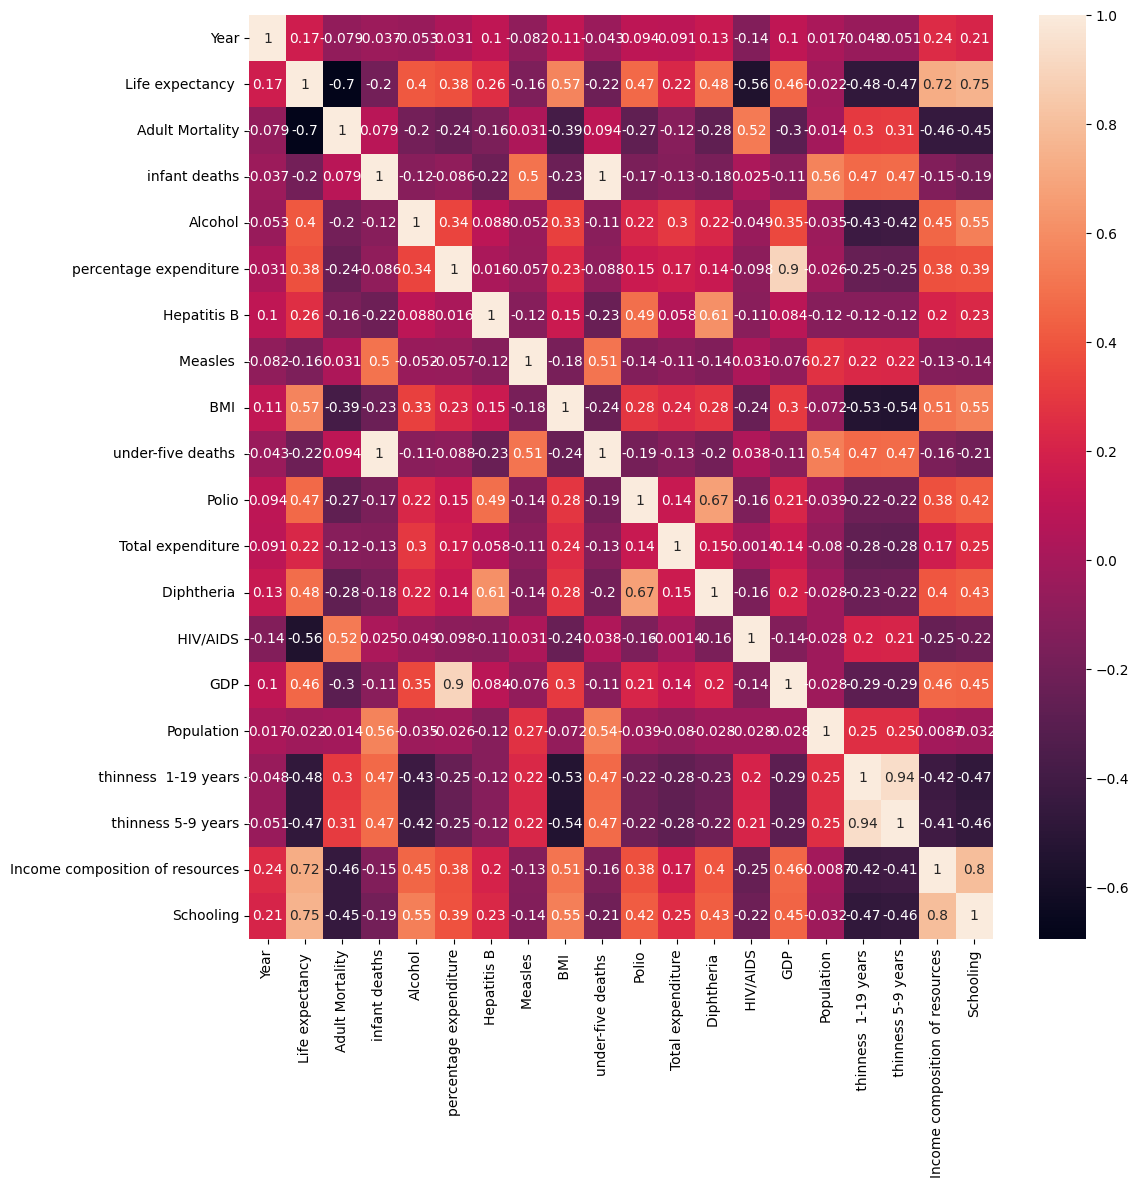

In [19]:
# Grafico de correlacion
numeric_cols = data.select_dtypes(include='number')
corre = numeric_cols.corr()

plt.figure(figsize= (12,12))
sns.heatmap(corre, annot=True);

In [20]:
# interpretaciones
#* El mapa de calor muestra las correlaciones entre las variables numéricas del conjunto de datos.
#* Las correlaciones positivas se muestran en rojo, mientras que las correlaciones negativas se muestran en azul.
#* La intensidad del color indica la fuerza de la correlación.
#* Las variables más correlacionadas con la esperanza de vida son : Income composition of recourses y schooling.
#* Las variables menos correlacionadas con la esperanza de vida son la tasa de mortalidad en adultos de ambos sexos (probabilidad de morir entre 15 y 69 años por cada 1000 habitantes) y el número de muertes infantiles por cada 1000 habitantes.
#* El mapa de calor también muestra que hay algunas correlaciones fuertes entre algunas de las variables numéricas. Por ejemplo, el gasto total del gobierno general en salud como porcentaje del gasto público (%)[GDP] está fuertemente correlacionado con el gasto en salud como porcentaje del PIB per cápita (%) [percentaje expediture].
#* Estos resultados pueden ser útiles para identificar variables que están asociadas con la esperanza de vida y para explorar posibles relaciones causales entre variables.

# Tratamiento de Datos faltantes y atipicos y codificacion

## Datos faltantes

In [21]:
# datos continuos = mediana o media
# datos discretos = moda
# datos categoricos = moda

# imoutacion de datos mediante KNNImputer

from sklearn.impute import KNNImputer
impute = KNNImputer()


In [22]:
for i in data.select_dtypes(include='number').columns:
  data[i] = impute.fit_transform(data[[i]])

In [23]:
# Datos faltantes luego de la imputacion de datos mediante KNN
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Datos atipicos

In [24]:
# funcion para encontar el rango minimo y maximo
def outl(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3 - q1
  lw = q1-1.5 * iqr
  uw = q3+1.5 * iqr
  return lw,uw

In [25]:
# seleccionar las columnas a las cuales vamos a eliminar los datos atipicos
for i in ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
    'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
    'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling']:
  lw,uw = outl(data[i])
  data[i] = np.where(data[i]<lw,lw,data[i])
  data[i] = np.where(data[i]>uw,uw,data[i])

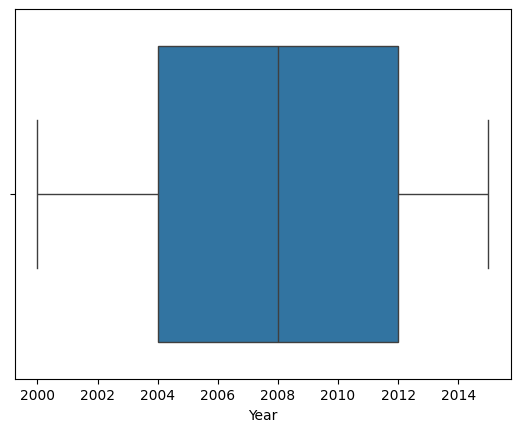

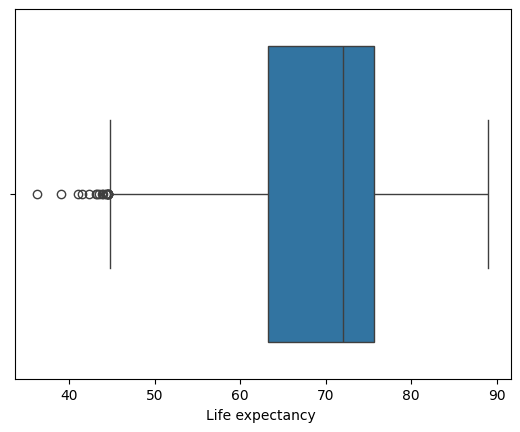

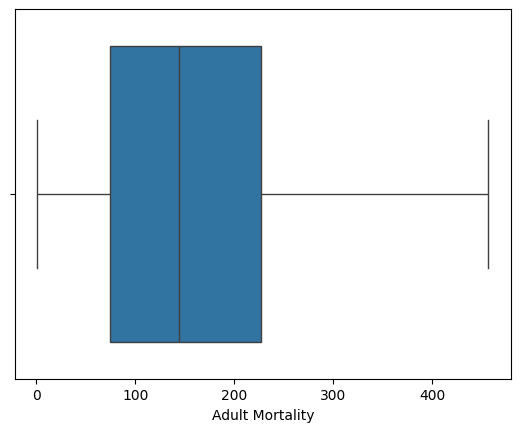

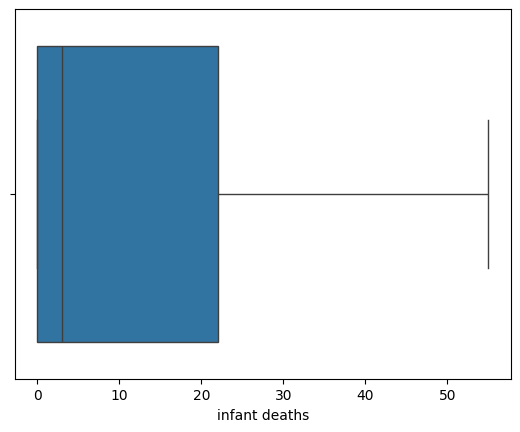

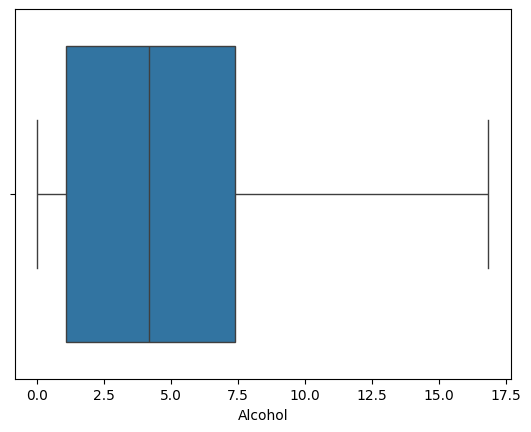

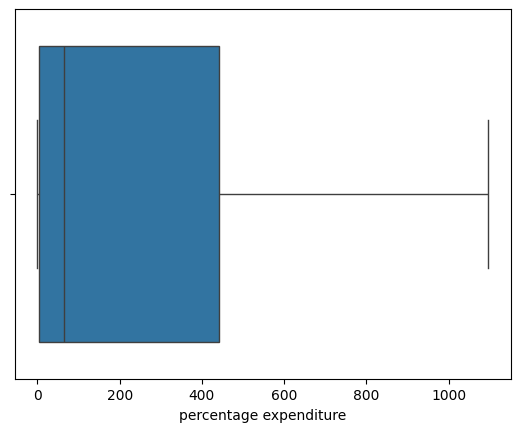

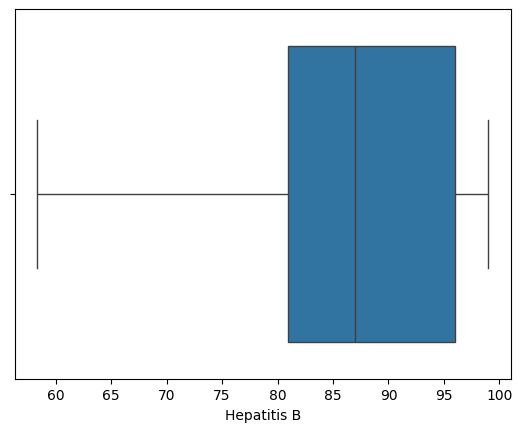

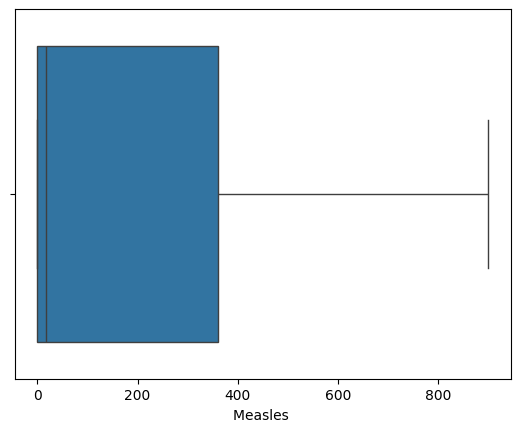

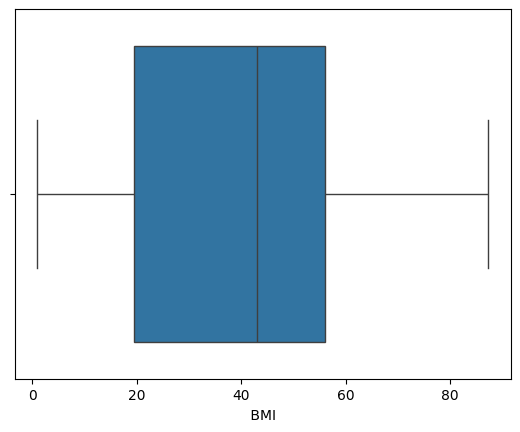

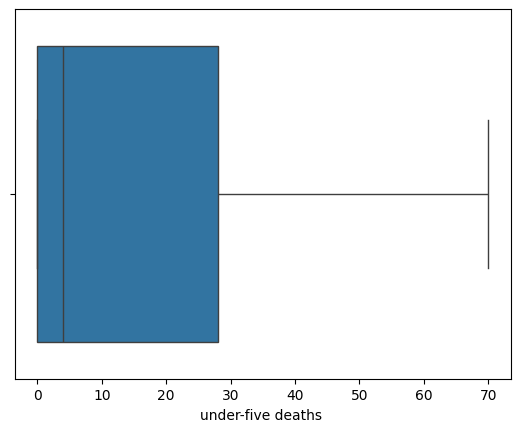

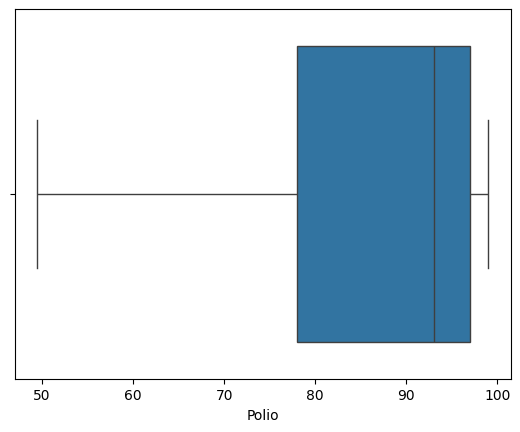

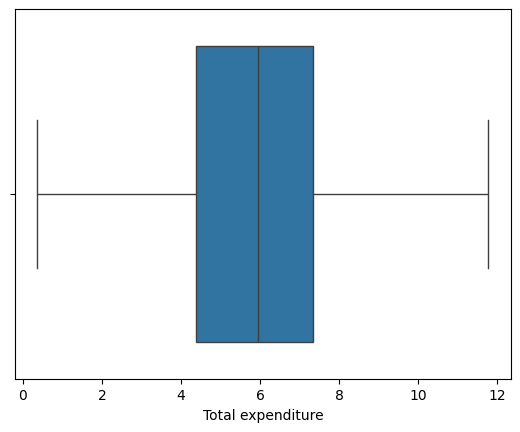

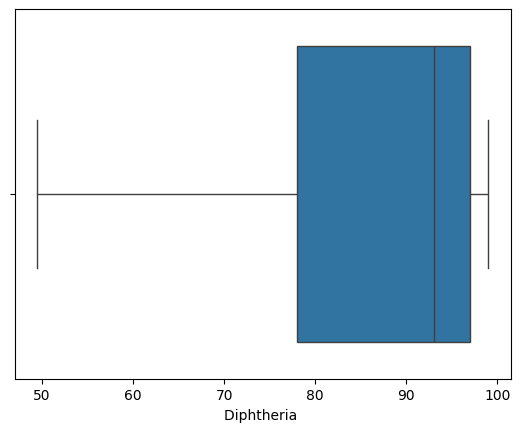

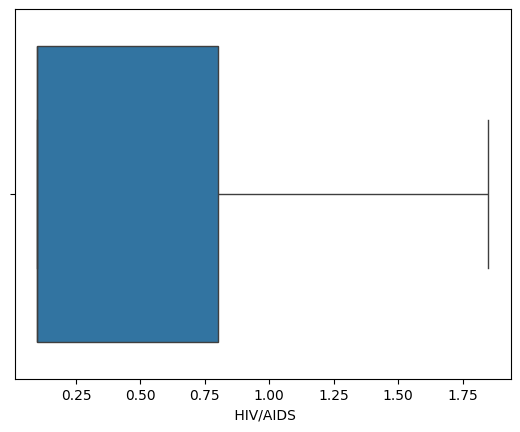

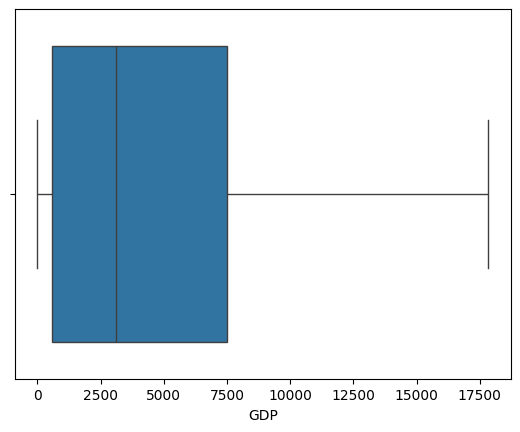

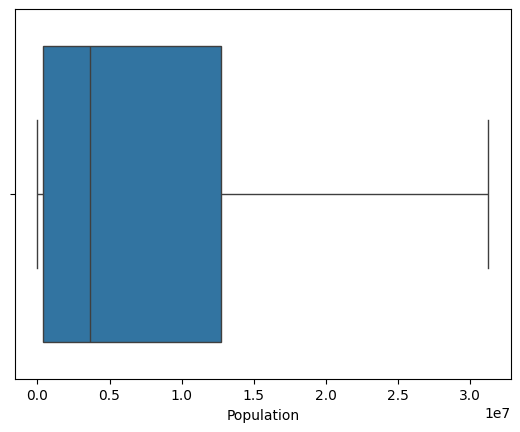

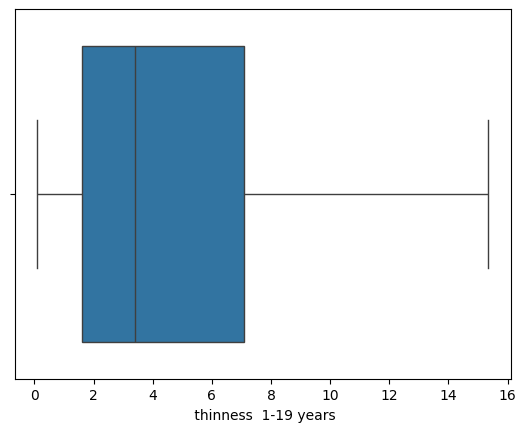

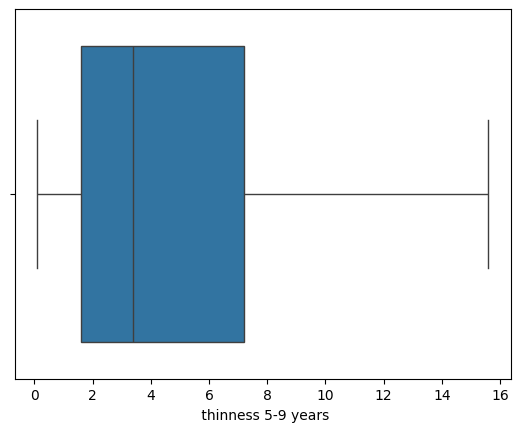

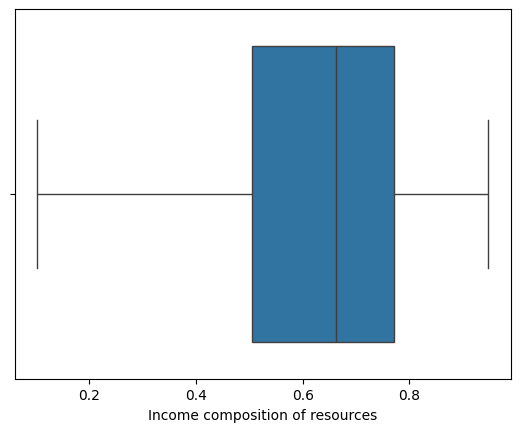

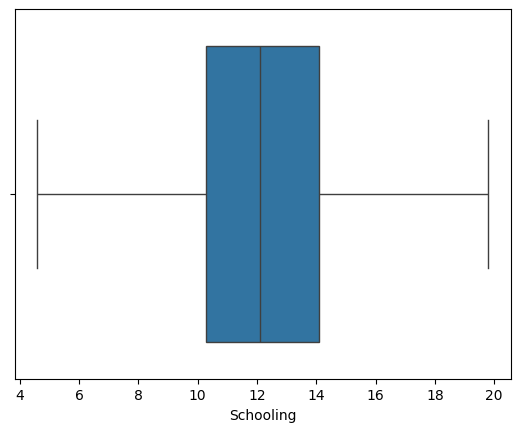

In [26]:
# Grafica para verificar el rango  de valores atipicos despues del tratamiento
for i in data.select_dtypes(include='number').columns:
  sns.boxplot(data=data, x=i)
  plt.show()

In [27]:
# podemos observar que el tratamiento fue exitoso y se realizo un rango y la eliminacion de datos por fuera del mismo.

## codificacion variables categoricas

In [28]:
cols_to_encode = ['Status']

# Aplicacion de labelEncoder
label_encoder_df = LabelEncoder()
for col in cols_to_encode:
    data[col] = label_encoder_df.fit_transform(data[col])

In [29]:
# mostrar nuevos valores codificados
data['Status'].unique()

# 1 developing
# 0 developed

array([1, 0])

## Graficas para analizar

In [30]:
fig = px.line(data.sort_values(by='Year'), x='Year', y='Life expectancy ',animation_frame='Country',animation_group='Year',color='Country', title='Trend of Life Expectancy Over the Years')

#update layout to center the title and make it bold
fig.update_layout(
    title=dict(text='<b>Trend of Life Expectancy Over the Years</b>', x=0.5)
)

fig.show()

In [31]:
data.head()

Country    Year  Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015.0       1              65.0            263.0   
1  Afghanistan  2014.0       1              59.9            271.0   
2  Afghanistan  2013.0       1              59.9            268.0   
3  Afghanistan  2012.0       1              59.5            272.0   
4  Afghanistan  2011.0       1              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0           55.0     0.01               71.279624         65.0   900.625   
1           55.0     0.01               73.523582         62.0   492.000   
2           55.0     0.01               73.219243         64.0   430.000   
3           55.0     0.01               78.184215         67.0   900.625   
4           55.0     0.01                7.097109         68.0   900.625   

    BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0   19.1                70.0   49.5               8.16         65.0   
1   18.6                70.0   58.0               8.18         62.0   
2   18.1                70.0   62.0               8.13         64.0   
3   17.6                70.0   67.0               8.52         67.0   
4   17.2                70.0   68.0               7.87         68.0   

    HIV/AIDS         GDP    Population   thinness  1-19 years  \
0        0.1  584.259210  3.125506e+07                  15.35   
1        0.1  612.696514  3.275820e+05                  15.35   
2        0.1  631.744976  3.125506e+07                  15.35   
3        0.1  669.959000  3.696958e+06                  15.35   
4        0.1   63.537231  2.978599e+06                  15.35   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 15.6                            0.479       10.1  
1                 15.6                            0.476       10.0  
2                 15.6                            0.470        9.9  
3                 15.6                            0.463        9.8  
4                 15.6                            0.454        9.5

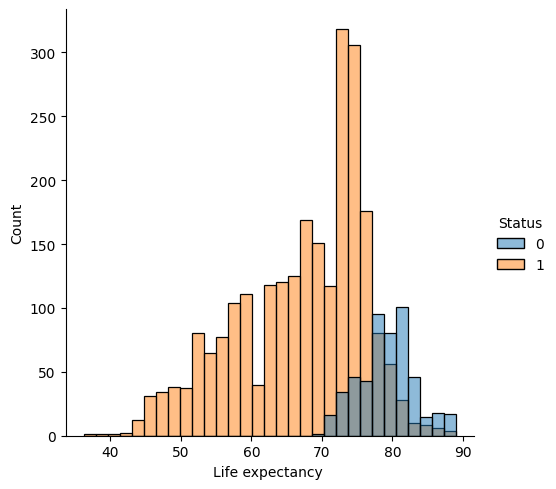

In [32]:
# grafica donde se muestra la distribucion de datos, entre la espectaiva de vida y la categoria de los paises
sns.displot(data, x='Life expectancy ', hue= 'Status');
# 0 developed
# 1 developing

In [33]:
# la esperanza de vida para paises desarrollados (developed) esta entre 70 y 90 años
# la esperanza de vida para paises en desarrollo (developing) esta entre 40 y 90 años
#Se puede observar que los países desarrollados tienen una esperanza de vida más alta que los países en desarrollo. Esto se debe a una serie de factores, como el acceso a una mejor atención médica, educación y nutrición. El gráfico también muestra que la esperanza de vida ha aumentado con el tiempo en ambos tipos de países. Esto se debe a los avances en la medicina y la tecnología, así como a la mejora de las condiciones de vida.

# Escalamiento datos

In [60]:
X = data.drop('Life expectancy ', axis=1)
y = data['Life expectancy ']

In [61]:
# Columns to scale
'''cols_to_scale = ['Status', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']'''


# Drop the 'Country' column
X = data.drop(['Country','Year','Life expectancy '], axis=1)

# Scale the remaining columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [62]:
# Dataframe escalado a min = 0 y max = 1
df_scaled = pd.DataFrame(X, columns= data.drop(['Country','Year','Life expectancy '], axis=1).columns)
df_scaled.describe()

Status  Adult Mortality  infant deaths      Alcohol  \
count  2938.000000      2938.000000    2938.000000  2938.000000   
mean      0.825732         0.353511       0.247911     0.272924   
std       0.379405         0.253532       0.347435     0.232640   
min       0.000000         0.000000       0.000000     0.000000   
25%       1.000000         0.160263       0.000000     0.064334   
50%       1.000000         0.313941       0.054545     0.246638   
75%       1.000000         0.496158       0.400000     0.438600   
max       1.000000         1.000000       1.000000     1.000000   

       percentage expenditure  Hepatitis B     Measles          BMI   \
count             2938.000000  2938.000000  2938.000000  2938.000000   
mean                 0.258975     0.646686     0.259537     0.432459   
std                  0.355081     0.314981     0.392630     0.230912   
min                  0.000000     0.000000     0.000000     0.000000   
25%                  0.004272     0.555718     0.000000     0.213210   
50%                  0.059184     0.704789     0.018876     0.486674   
75%                  0.402563     0.926197     0.400000     0.638470   
max                  1.000000     1.000000     1.000000     1.000000   

       under-five deaths         Polio  Total expenditure  Diphtheria   \
count         2938.000000  2938.000000        2938.000000  2938.000000   
mean             0.256657     0.723009           0.485487     0.721876   
std              0.359922     0.319175           0.200828     0.318793   
min              0.000000     0.000000           0.000000     0.000000   
25%              0.000000     0.575758           0.350877     0.575758   
50%              0.057143     0.878788           0.488438     0.878788   
75%              0.400000     0.959596           0.610526     0.959596   
max              1.000000     1.000000           1.000000     1.000000   

          HIV/AIDS          GDP   Population   thinness  1-19 years  \
count  2938.000000  2938.000000  2938.000000            2938.000000   
mean      0.249266     0.288310     0.245772               0.301986   
std       0.396225     0.313808     0.284658               0.257720   
min       0.000000     0.000000     0.000000               0.000000   
25%       0.000000     0.032452     0.013402               0.098361   
50%       0.000000     0.174645     0.117610               0.216393   
75%       0.400000     0.419471     0.408041               0.459016   
max       1.000000     1.000000     1.000000               1.000000   

        thinness 5-9 years  Income composition of resources    Schooling  
count          2938.000000                      2938.000000  2938.000000  
mean              0.298331                         0.626310     0.489722  
std               0.256346                         0.226598     0.203996  
min               0.000000                         0.000000     0.000000  
25%               0.096774                         0.475085     0.375000  
50%               0.212903                         0.661689     0.493421  
75%               0.458065                         0.791808     0.625000  
max               1.000000                         1.000000     1.000000

In [77]:
#reducicion de dimension mediante pca con los datos escalados

from sklearn.decomposition import PCA

# Create a PCA instance with n_components set to 2
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled data
pca.fit(X)

reduced_scaled = pca.transform(df_scaled)

# Print the explained variance by each principal component
print(pca.explained_variance_ratio_)


[0.39627011 0.11831566]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but PCA was fitted without feature names



In [78]:
df_reduced_scaled = pd.DataFrame(reduced_scaled)


In [79]:
df_reduced_scaled.head()

0         1
0  1.638741  0.754304
1  1.452589  0.339619
2  1.449091  0.498630
3  1.490851  0.511307
4  1.510960  0.454976

# Regresion

## regresion lineal multiple

### Regresion lineal multiple con 2 variables independientes

In [80]:
df_reduced_scaled.head()

0         1
0  1.638741  0.754304
1  1.452589  0.339619
2  1.449091  0.498630
3  1.490851  0.511307
4  1.510960  0.454976

In [81]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Get the column names of df_reduced_scaled
column_names = df_reduced_scaled.columns

# Fit the model to the reduced data with two variables
X_train = df_reduced_scaled[column_names[:2]]
y_train = y

model.fit(X_train, y_train)

# Predict the life expectancy for a new set of data
new_data = [[0.5, 0.5]]
predicted_life_expectancy = model.predict(new_data)[0]

# Print the predicted life expectancy
print(f"Predicted life expectancy: {predicted_life_expectancy}")

# Calculate the R-squared value
r2 = r2_score(y_train, model.predict(X_train))

# Print the R-squared value
print(f"R2: {r2}")


Predicted life expectancy: 66.04515971371052
R2: 0.7265643561194612


Se puede deducir que el modelo en gran parte se acerca con los datos reales a la prediccion con un 0.72 de metrica de evaluacion queriendo decir que le falta un poco en el porcentaje, pero se considera bueno

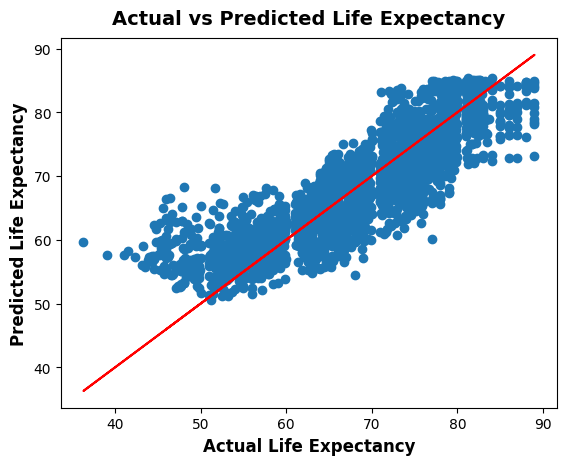

In [82]:
# Grafica de la regresion lineal
import matplotlib.pyplot as plt

# Get the predicted life expectancy for the entire dataset
predicted_life_expectancy = model.predict(df_reduced_scaled)

# Plot the actual and predicted life expectancy values
plt.scatter(y, predicted_life_expectancy)

# Add a line to show the linear regression fit
plt.plot(y, y, color='red')

# Set the title and axis labels
plt.title("Actual vs Predicted Life Expectancy")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")

# Show the plot
plt.show()


# Clustering

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans

import random
import time

std_figure_size = (8,5)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

fixed_random_state = random.seed(42)
n_parallel_jobs = -1

%config IPCompleter.use_jedi=False



## Dataset Normalizado con las columnas a segmentar

In [84]:
X = StandardScaler().fit_transform(data.drop(['Country','Year'],axis=1))

In [85]:
X = PowerTransformer(standardize=False).fit_transform(X)

In [86]:
X = pd.DataFrame(X, columns=data.drop(['Country','Year'],axis=1).columns)

In [87]:
X.head()

Status  Life expectancy   Adult Mortality  infant deaths   Alcohol  \
0  1.075975         -0.405484         0.725038       0.758077 -1.505745   
1  1.075975         -0.821791         0.773438       0.758077 -1.505745   
2  1.075975         -0.821791         0.755402       0.758077 -1.505745   
3  1.075975         -0.852014         0.779420       0.758077 -1.505745   
4  1.075975         -0.874484         0.797279       0.758077 -1.505745   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.836876    -1.056917  0.646545 -0.879716   
1               -0.824689    -1.171968  0.419543 -0.900896   
2               -0.826337    -1.096099  0.355163 -0.922010   
3               -0.799628    -0.975825  0.646545 -0.943059   
4               -1.219546    -0.933813  0.646545 -0.959852   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0            0.738474 -0.956799           0.931342    -0.710070  -1.159149   
1            0.738474 -0.837024           0.939229    -0.767979  -1.159149   
2            0.738474 -0.768775           0.919501    -0.730087  -1.159149   
3            0.738474 -0.668609           1.072554    -0.667645  -1.159149   
4            0.738474 -0.646133           0.816377    -0.645125  -1.159149   

        GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0 -1.207459    1.205915               1.402017             1.419321   
1 -1.197425   -1.216394               1.402017             1.419321   
2 -1.190722    1.205915               1.402017             1.419321   
3 -1.177318   -0.561110               1.402017             1.419321   
4 -1.396897   -0.686731               1.402017             1.419321   

   Income composition of resources  Schooling  
0                        -0.674845  -0.598352  
1                        -0.686237  -0.627866  
2                        -0.708865  -0.657277  
3                        -0.735005  -0.686589  
4                        -0.768215  -0.773944

## Reduccion de dimensionalidad

In [88]:
reducer = umap.UMAP(n_components=2, n_neighbors=25, n_jobs=n_parallel_jobs, random_state=fixed_random_state)
embedding = reducer.fit_transform(X)

X = pd.DataFrame(embedding, columns=["comp_1", "comp_2"])

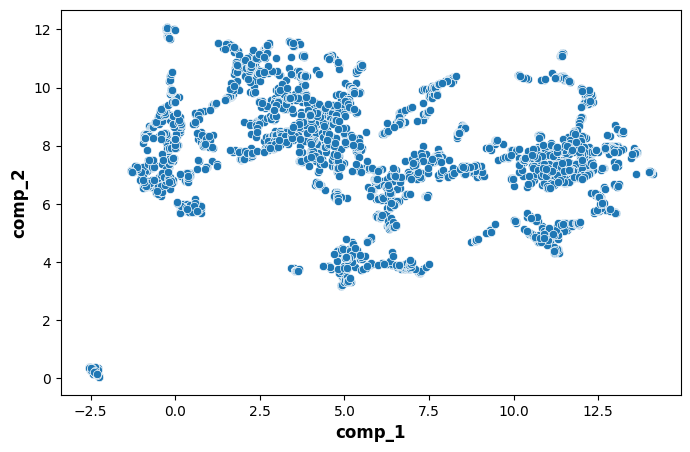

In [89]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(data= X, x="comp_1", y="comp_2")
plt.show()

En la grafica se puede observar que los datapoints estan muy juntos, por ende la clusterizacion va tener un porcentaje bajo en la metrica de evaluacion

In [90]:
# function to visualize identified clusters

def visualize_clusters(*, df, labels_all, hyperparam_name, hyperparam_val, noise_exist):
    """Visualisation of identified clusters. Only a single hyperparameter is considered.

    Arguments
    =========
    df: pandas.DataFrame
        Dataframe of input features.
    labels_all: list | numpy.array
        Identified cluster IDs.
    hyperparam_name: str | None
        Name of hyperparameter.
    hyperparam_val: float | int | None
        Value of hyperparameter.
    noise_exist: bool
        True if algo models noise, False otherwise.
        Assumes encoding of noise as cluster ID = -1.

    Returns
    =======
    None
    Prints a figure.

    """

    # Checking of input parameters omitted for this notebook

    labels = sorted(pd.Series(labels_all).unique())

    if noise_exist:

        outlier_perc = int(round(( (len(df) - sum(np.where(labels_all == -1, False, True))) / len(df) ) * 100, 0))

        plt.figure(figsize=std_figure_size)
        for label in labels:
            if label == -1:
                marker_style = "*"
            else:
                marker_style = "o"
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label), marker=marker_style)
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}; 'Noise': {outlier_perc}%")
        else:
            plt.title(f"Defaults for all hyperparameters; 'Noise': {outlier_perc}%")
        plt.legend(title="cluster ID")
        plt.show()

    else:

        plt.figure(figsize=std_figure_size)
        for label in labels:
            sns.scatterplot(data=df.loc[labels_all == label, :], x="comp_1", y="comp_2", label=str(label))
        if hyperparam_name or hyperparam_val:
            plt.title(f"{hyperparam_name}: {hyperparam_val}")
        else:
            plt.title(f"Defaults for all hyperparameters")
        plt.legend(title="cluster ID")
        plt.show()


def convergence_check(model):
    """Checking if fitted model converged within the max. number of iterations."""
    if model.n_iter_ < model.max_iter:
        print(f"Algorithm converged successfully!\nn_iter: {model.n_iter_}, max_iter: {model.max_iter}\n")
    else:
        print(f"WARNING: Algorithm did not converge within {model.max_iter} iterations!\n")

## Algoritmo KMeans

In [91]:
kmeans_hparam = "n_clusters"

In [92]:
inertias_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    inertias_1.append(kmeans_1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

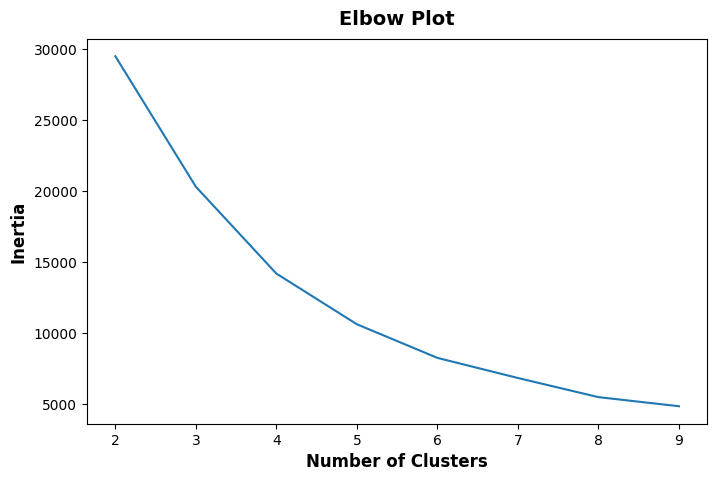

In [93]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=inertias_1)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

La grafica muestra que un numero optimo de cluster esta entre 2 y 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

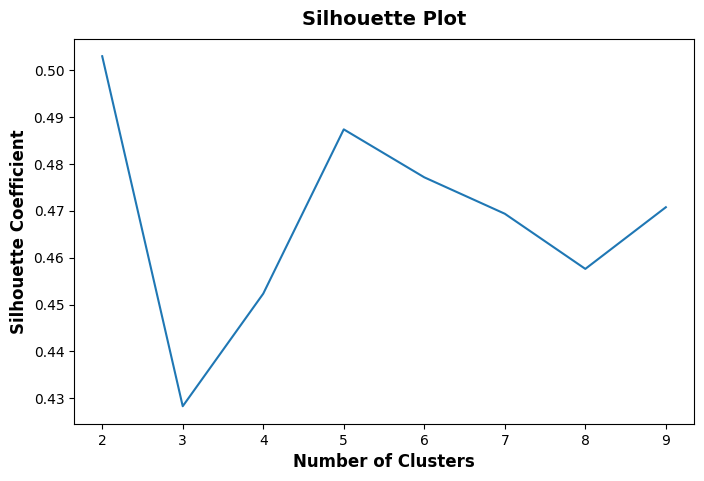

In [94]:
from sklearn.metrics import silhouette_score

silhouettes_1 = []
range_clusters_1 = np.arange(2, 10, dtype=int)

for n in range_clusters_1:
    kmeans_1 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X)
    silhouettes_1.append(silhouette_score(X, kmeans_1.labels_))

fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_1, y=silhouettes_1)
plt.title('Silhouette Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


Con la grafica de la silueta se puede deducir mas facilmente que el numero optimo de cluster es 2, debido a que esta metrica nos dice el numero optimo donde se encuentre el pico mas alto en el eje Y

In [95]:
%%time

training_times = []

start_time = time.time()

kmeans = KMeans(n_clusters=2, random_state=fixed_random_state)

labels_1 = kmeans.fit_predict(X)

convergence_check(kmeans)

training_times.append(time.time() - start_time)

Algorithm converged successfully!
n_iter: 7, max_iter: 300

CPU times: user 54.4 ms, sys: 0 ns, total: 54.4 ms
Wall time: 35.2 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



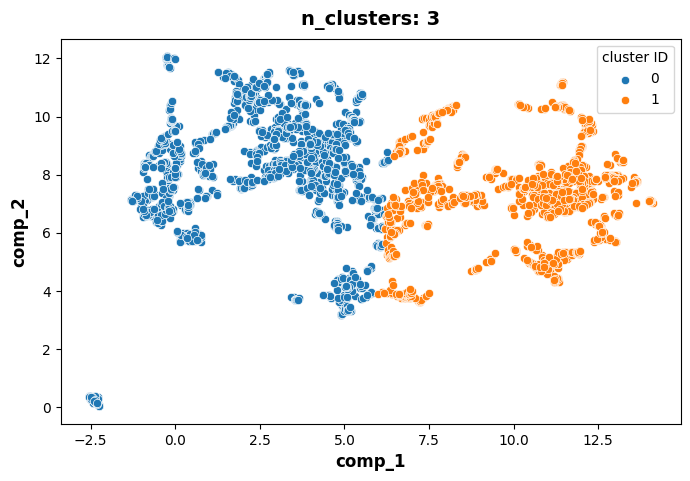

In [96]:
visualize_clusters(df=X, labels_all=labels_1, hyperparam_name=kmeans_hparam, hyperparam_val=3, noise_exist=False)

## Evaluacion del modelo de clustering

In [97]:
# Evaluacion del rendimiento del cluster mediante el coeficiente de silueta y el porcentaje

from sklearn.metrics import silhouette_score

# Calcula silhouette score para el clustering
silhouette_avg = silhouette_score(X, labels_1)

print("Silhouette score:", silhouette_avg)

# Calcula el porcentaje de muestras bie agrupadas
well_clustered_samples = len(labels_1[labels_1 == 0]) + len(labels_1[labels_1 == 1])
percentage_well_clustered = well_clustered_samples / len(labels_1) * 100

print("Porcentaje de muestras bien agrupadas:", percentage_well_clustered,'%')


Silhouette score: 0.5029803
Porcentaje de muestras bien agrupadas: 100.0 %


El puntaje de silueta muestra que los cluster no tiene un buen comportamiento,al tener un 0.50 de puntaje, siendo el mejor puntaje 1 y el menos optimo -1, para este caso de estudio se obtuvo un porcentaje bajo, esto se debe a la cercania de los datapoint

# Conclusiones

Despues de los pasos que se siguieron para el desarrollo de caso de estudio se pudo evidenciar que estudiadas todas las variables recolectadas en una nacion ,las caracteristicas que mas se relacionan con la esperanza de vida de los habitantes de una nacion son anos de escolaridad y el indice de desarrollo humano en composicion de los recursos, permitiendo hacer una prediccion con estas variables y conocer una espectativa de vida en funcion de estos dos datos


1. **Datos faltantes y atipicos:**
    * Se imputaron los datos faltantes utilizando el algoritmo KNNImputer.
    * Se eliminaron los datos atipicos utilizando la técnica de rango intercuartil.


2. **Codificacion de variables categoricas:**
    * Se codificaron las variables categoricas utilizando el algoritmo LabelEncoder.


3. **Escalamiento de datos:**
    * Se escalaron los datos numéricos utilizando el algoritmo MinMaxScaler.


4. **Regresión lineal:**
    * Se realizó una regresión lineal simple para analizar la relación entre la esperanza de vida y el ingreso promedio de los recursos.
    * Se realizó una regresión lineal múltiple para analizar la relación entre la esperanza de vida, el nivel de escolaridad y el ingreso promedio de los recursos.


5. **Predicción:**
    * Se generó una predicción de la esperanza de vida para un nuevo caso utilizando el modelo de regresión lineal múltiple.

6. **Clustering**
    * el modelo de agrupamiento iindica que hay muchas similitudes en las carcateristicas de los datapoints, generando que los dos cluster optimos estan muy cercanos, dandole asi un bajo puntaje en la metrica de silueta
6. **Conclusiones:**
    * El nivel de escolaridad y el ingreso promedio de los recursos son factores importantes que influyen en la esperanza de vida.
    * El modelo de regresión lineal múltiple desarrollado puede ser utilizado para predecir la esperanza de vida de un país en función de su nivel de escolaridad y su ingreso promedio de los recursos.